In [25]:
%load_ext autoreload
%autoreload 2

from importlib import reload

import numpy as np
import matplotlib.pyplot as plt
import pint
import scipy.linalg
import seaborn as sns
import pandas as pd
import tabulate

import funkcje as fun

from scipy.linalg import eigh

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
s_loc = pd.read_csv('S_loc_N2_L100.dat.txt', sep=r'\s+', header=None)
s_loc.columns = ['i', 'j', 'value']
s_loc = s_loc.pivot(index='i', columns='j', values='value')
s_loc = np.array(s_loc)

t_loc = pd.read_csv('T_loc_N2_L100.dat.txt', sep=r'\s+', header=None)
t_loc.columns = ['i', 'j', 'value']
t_loc = t_loc.pivot(index='i', columns='j', values='value')
t_loc = np.array(t_loc)

v_loc = pd.read_csv('V_loc_N2_L100_element_11.dat.txt', sep=r'\s+', header=None)
v_loc.columns = ['i', 'j', 'value']
v_loc = v_loc.pivot(index='i', columns='j', values='value')
v_loc = np.array(v_loc)

# print(tabulate.tabulate(s_loc, tablefmt="github", floatfmt=".3f"))

In [3]:
print('--- Lokalna macierz przekrywania ---\n')
# print(tabulate.tabulate(calcLocalOverlapMatrix(aa**2/4).magnitude, tablefmt="github", floatfmt=".3f"))

print('\n--- Odniesienie ---\n')
print(tabulate.tabulate(s_loc, tablefmt="github", floatfmt=".3f"))

--- Lokalna macierz przekrywania ---


--- Odniesienie ---

|----------|----------|----------|----------|-----------|-----------|-----------|-----------|-----------|
| 3967.509 | -991.877 | -991.877 |  247.969 |  1983.754 |  -495.938 |  1983.754 |  -495.938 |   991.877 |
| -991.877 | 3967.509 |  247.969 | -991.877 |  1983.754 |  1983.754 |  -495.938 |  -495.938 |   991.877 |
| -991.877 |  247.969 | 3967.509 | -991.877 |  -495.938 |  -495.938 |  1983.754 |  1983.754 |   991.877 |
|  247.969 | -991.877 | -991.877 | 3967.509 |  -495.938 |  1983.754 |  -495.938 |  1983.754 |   991.877 |
| 1983.754 | 1983.754 | -495.938 | -495.938 | 15870.034 |   991.877 |   991.877 | -3967.507 |  7935.014 |
| -495.938 | 1983.754 | -495.938 | 1983.754 |   991.877 | 15870.034 | -3967.507 |   991.877 |  7935.014 |
| 1983.754 | -495.938 | 1983.754 | -495.938 |   991.877 | -3967.507 | 15870.034 |   991.877 |  7935.014 |
| -495.938 | -495.938 | 1983.754 | 1983.754 | -3967.507 |   991.877 |   991.877 | 15870.034 

In [26]:
print('--- Lokalna macierz energii kinetycznej ---\n')
print(tabulate.tabulate(fun.calcKineticEnergyMatrix().magnitude, tablefmt="github", floatfmt=".3f"))


print('\n--- Odniesienie ---\n')
print(tabulate.tabulate(t_loc, tablefmt="github", floatfmt=".3f"))
# calcLocalOverlapMatrix()[0][0]

--- Lokalna macierz energii kinetycznej ---

|--------|--------|--------|--------|--------|--------|--------|--------|--------|
|  4.643 | -0.249 | -0.249 | -0.166 | -1.493 |  0.829 | -1.493 |  0.829 | -2.653 |
| -0.249 |  4.643 | -0.166 | -0.249 | -1.493 | -1.493 |  0.829 |  0.829 | -2.653 |
| -0.249 | -0.166 |  4.643 | -0.249 |  0.829 |  0.829 | -1.493 | -1.493 | -2.653 |
| -0.166 | -0.249 | -0.249 |  4.643 |  0.829 | -1.493 |  0.829 | -1.493 | -2.653 |
| -1.493 | -1.493 |  0.829 |  0.829 | 14.594 | -2.653 | -2.653 | -0.000 | -7.960 |
|  0.829 | -1.493 |  0.829 | -1.493 | -2.653 | 14.594 | -0.000 | -2.653 | -7.960 |
| -1.493 |  0.829 | -1.493 |  0.829 | -2.653 | -0.000 | 14.594 | -2.653 | -7.960 |
|  0.829 |  0.829 | -1.493 | -1.493 | -0.000 | -2.653 | -2.653 | 14.594 | -7.960 |
| -2.653 | -2.653 | -2.653 | -2.653 | -7.960 | -7.960 | -7.960 | -7.960 | 42.454 |

--- Odniesienie ---

|--------|--------|--------|--------|--------|--------|--------|--------|--------|
|  4.643 | -0.249 | 

In [5]:
# potEnMatrix = buildPotentialEnergyMatrix()
# potEnMatrix = calcLocalPotentialEnergyMatrix(10, 100, aa**2/4*m*omega**2/2)
# print(tabulate.tabulate(calcKineticEnergyMatrix().magnitude, tablefmt="github", floatfmt=".5f"))
# calcX(1, 1, 10) * 0.05292

In [6]:
print("--- Macierz energii potencjalnej dla elementu k = 11 ---\n")
# print(tabulate.tabulate((potEnMatrix).magnitude, tablefmt="github", floatfmt=".3f"))

print('\n--- Odniesienie ---\n')
print(tabulate.tabulate(v_loc, tablefmt="github", floatfmt=".3f"))

--- Macierz energii potencjalnej dla elementu k = 11 ---


--- Odniesienie ---

|--------|--------|--------|--------|--------|--------|--------|--------|--------|
|  0.286 | -0.393 | -0.393 |  0.179 | -0.215 | -0.107 | -0.215 | -0.107 | -0.286 |
| -0.393 |  3.291 |  0.179 | -1.145 |  1.788 |  1.288 | -0.107 | -0.608 |  0.715 |
| -0.393 |  0.179 |  3.291 | -1.145 | -0.107 | -0.608 |  1.788 |  1.288 |  0.715 |
|  0.179 | -1.145 | -1.145 |  6.295 | -0.608 |  3.291 | -0.608 |  3.291 |  1.717 |
| -0.215 |  1.788 | -0.107 | -0.608 |  5.150 |  0.715 | -0.286 | -2.575 |  1.145 |
| -0.107 |  1.288 | -0.608 |  3.291 |  0.715 | 17.168 | -2.575 |  1.717 |  9.156 |
| -0.215 | -0.107 |  1.788 | -0.608 | -0.286 | -2.575 |  5.150 |  0.715 |  1.145 |
| -0.107 | -0.608 |  1.288 |  3.291 | -2.575 |  1.717 |  0.715 | 17.168 |  9.156 |
| -0.286 |  0.715 |  0.715 |  1.717 |  1.145 |  9.156 |  1.145 |  9.156 | 36.625 |


In [27]:
boxLengths = np.linspace(10, 200, 22)
energyValues = {i: [] for i in [2, 4, 6]}
N = [2, 4, 6]
for n in N:
    progress = 0
    print(n)
    for L in boxLengths:
        fun.update_progress(progress, len(boxLengths) - 1)
        S, H = fun.buildGlobalMatrices(n, L)
        fun.makeBoundCondsForGlobalMatrices(S, H)
        eigenvalues, eigenvectors = eigh(H, S)
        E = eigenvalues
        c = eigenvectors
        energyValues[n].append(E[E > 0])
        progress += 1

6
[██████████████████████████████] 100.00%

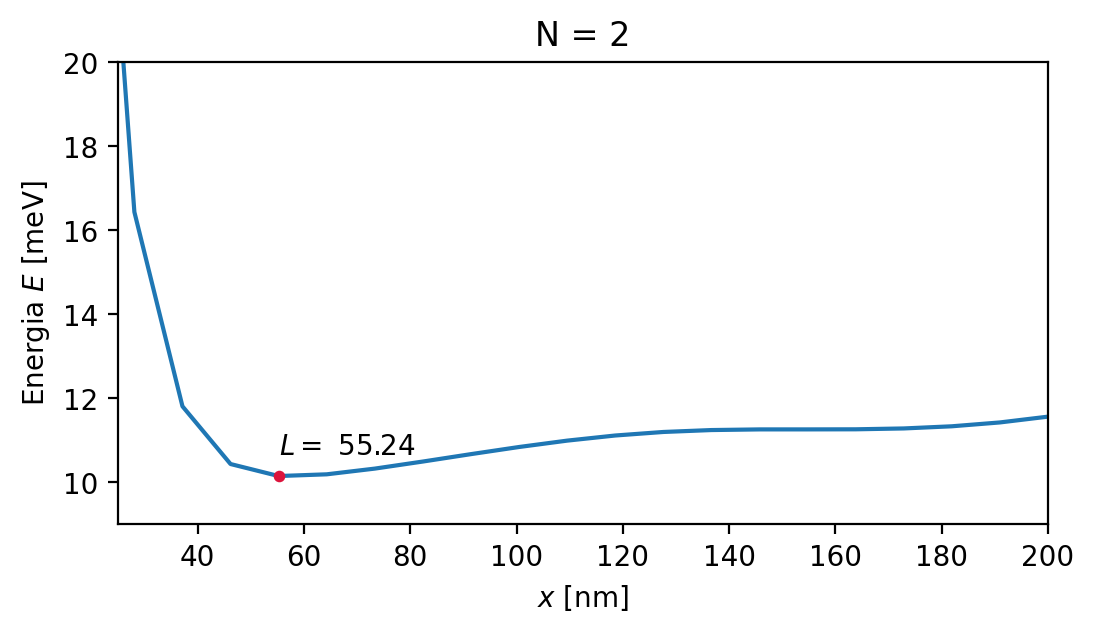

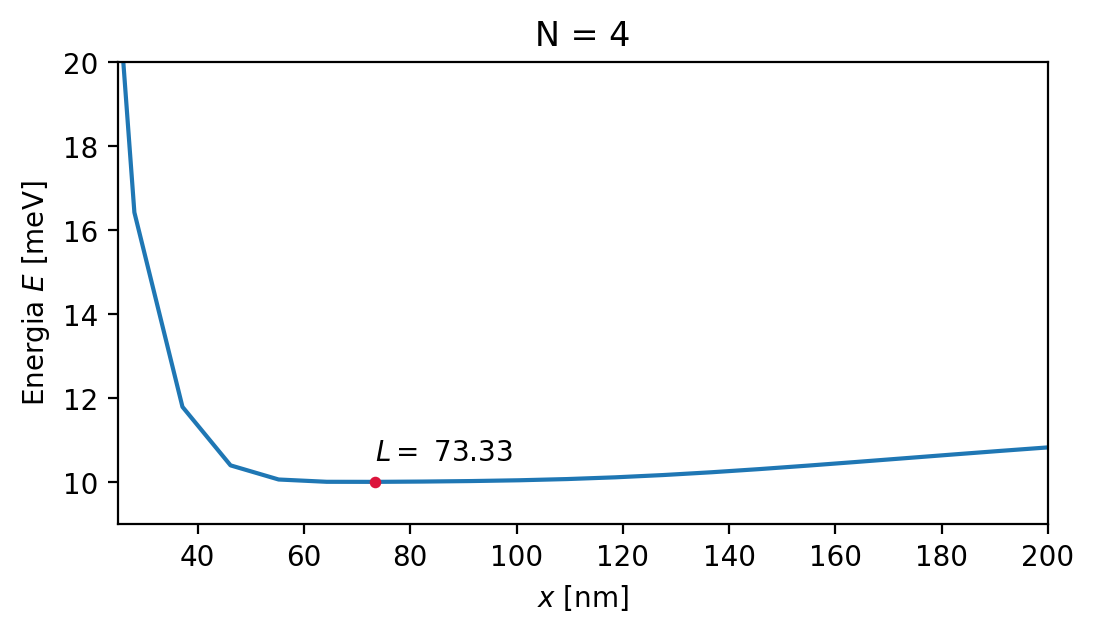

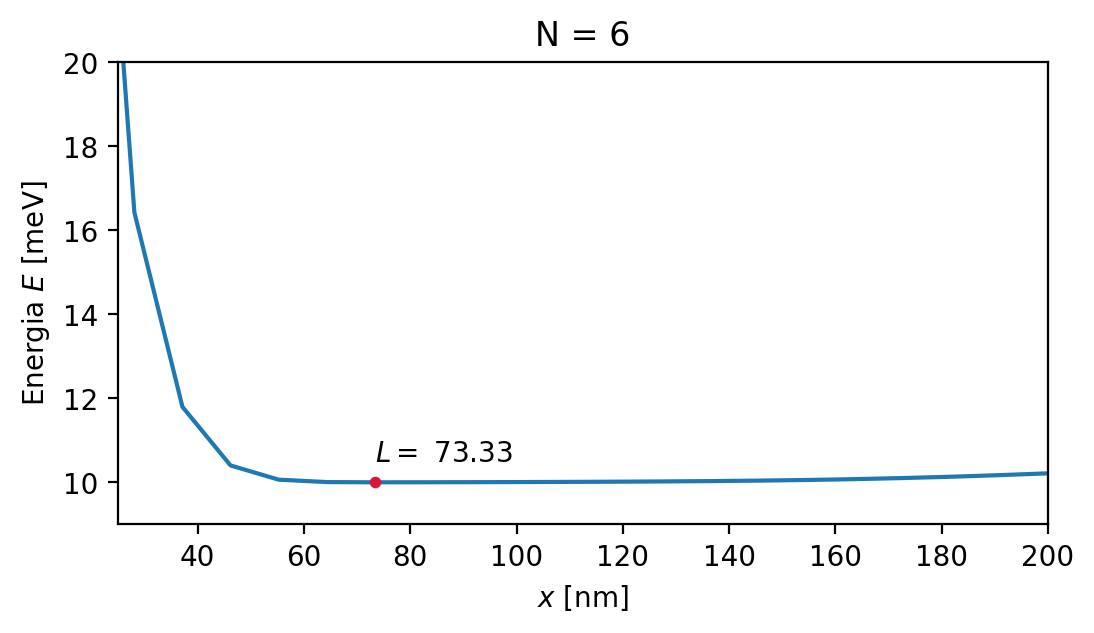

In [8]:
bestL = {}
for n in [2, 4, 6]:
    plt.figure(dpi=200, figsize=(6, 3))
    e = np.array(energyValues[n])[:, 0] * 27211.6
    plt.plot(boxLengths, e)
    idx = np.argmin(e)
    plt.scatter(boxLengths[idx], e[idx], color='crimson', s=10, zorder=2)
    plt.text(boxLengths[idx], e[idx]*1.05, s=f'$L =$ {boxLengths[idx]:.2f}')
    plt.title(f"N = {n}")
    plt.xlabel("$x$ [nm]")
    plt.ylabel("Energia $E$ [meV]")
    plt.ylim(9, 20)
    plt.xlim(25, 200)

    bestL[n] = boxLengths[idx]

In [ ]:
results = {}
for N in [2, 4, 6]:
    L = bestL[N]
    S, H = fun.buildGlobalMatrices(N, L)
    fun.makeBoundCondsForGlobalMatrices(S, H)
    eigva, eigve = eigh(H, S)
    validIndexes = eigva > 0
    test = eigva.copy()
    eigva = eigva[validIndexes]
    eigve = eigve[:, validIndexes]
    results[N] = {"E": eigva, "c": eigve}

In [10]:
print(tabulate.tabulate(results[2]["c"], tablefmt='github'))

|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|
|  0           |  0           |  0           |  0           |  0           |  0           |  0           |  0           |  0           |  0           |  0           |  0           |  0           |  0           |  0           |  0           |  0           |  0    

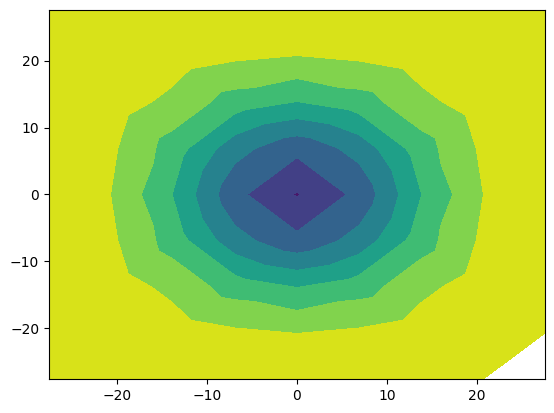

In [ ]:
arr = results[2]["c"][:, 0]
xGrid = [fun.xy(k, 'x', bestL[2], 2) * .05292 for k in range(0, 81)]
yGrid = [fun.xy(k, 'y', bestL[2], 2) * .05292 for k in range(0, 81)]

plt.tricontourf(xGrid, yGrid, arr)

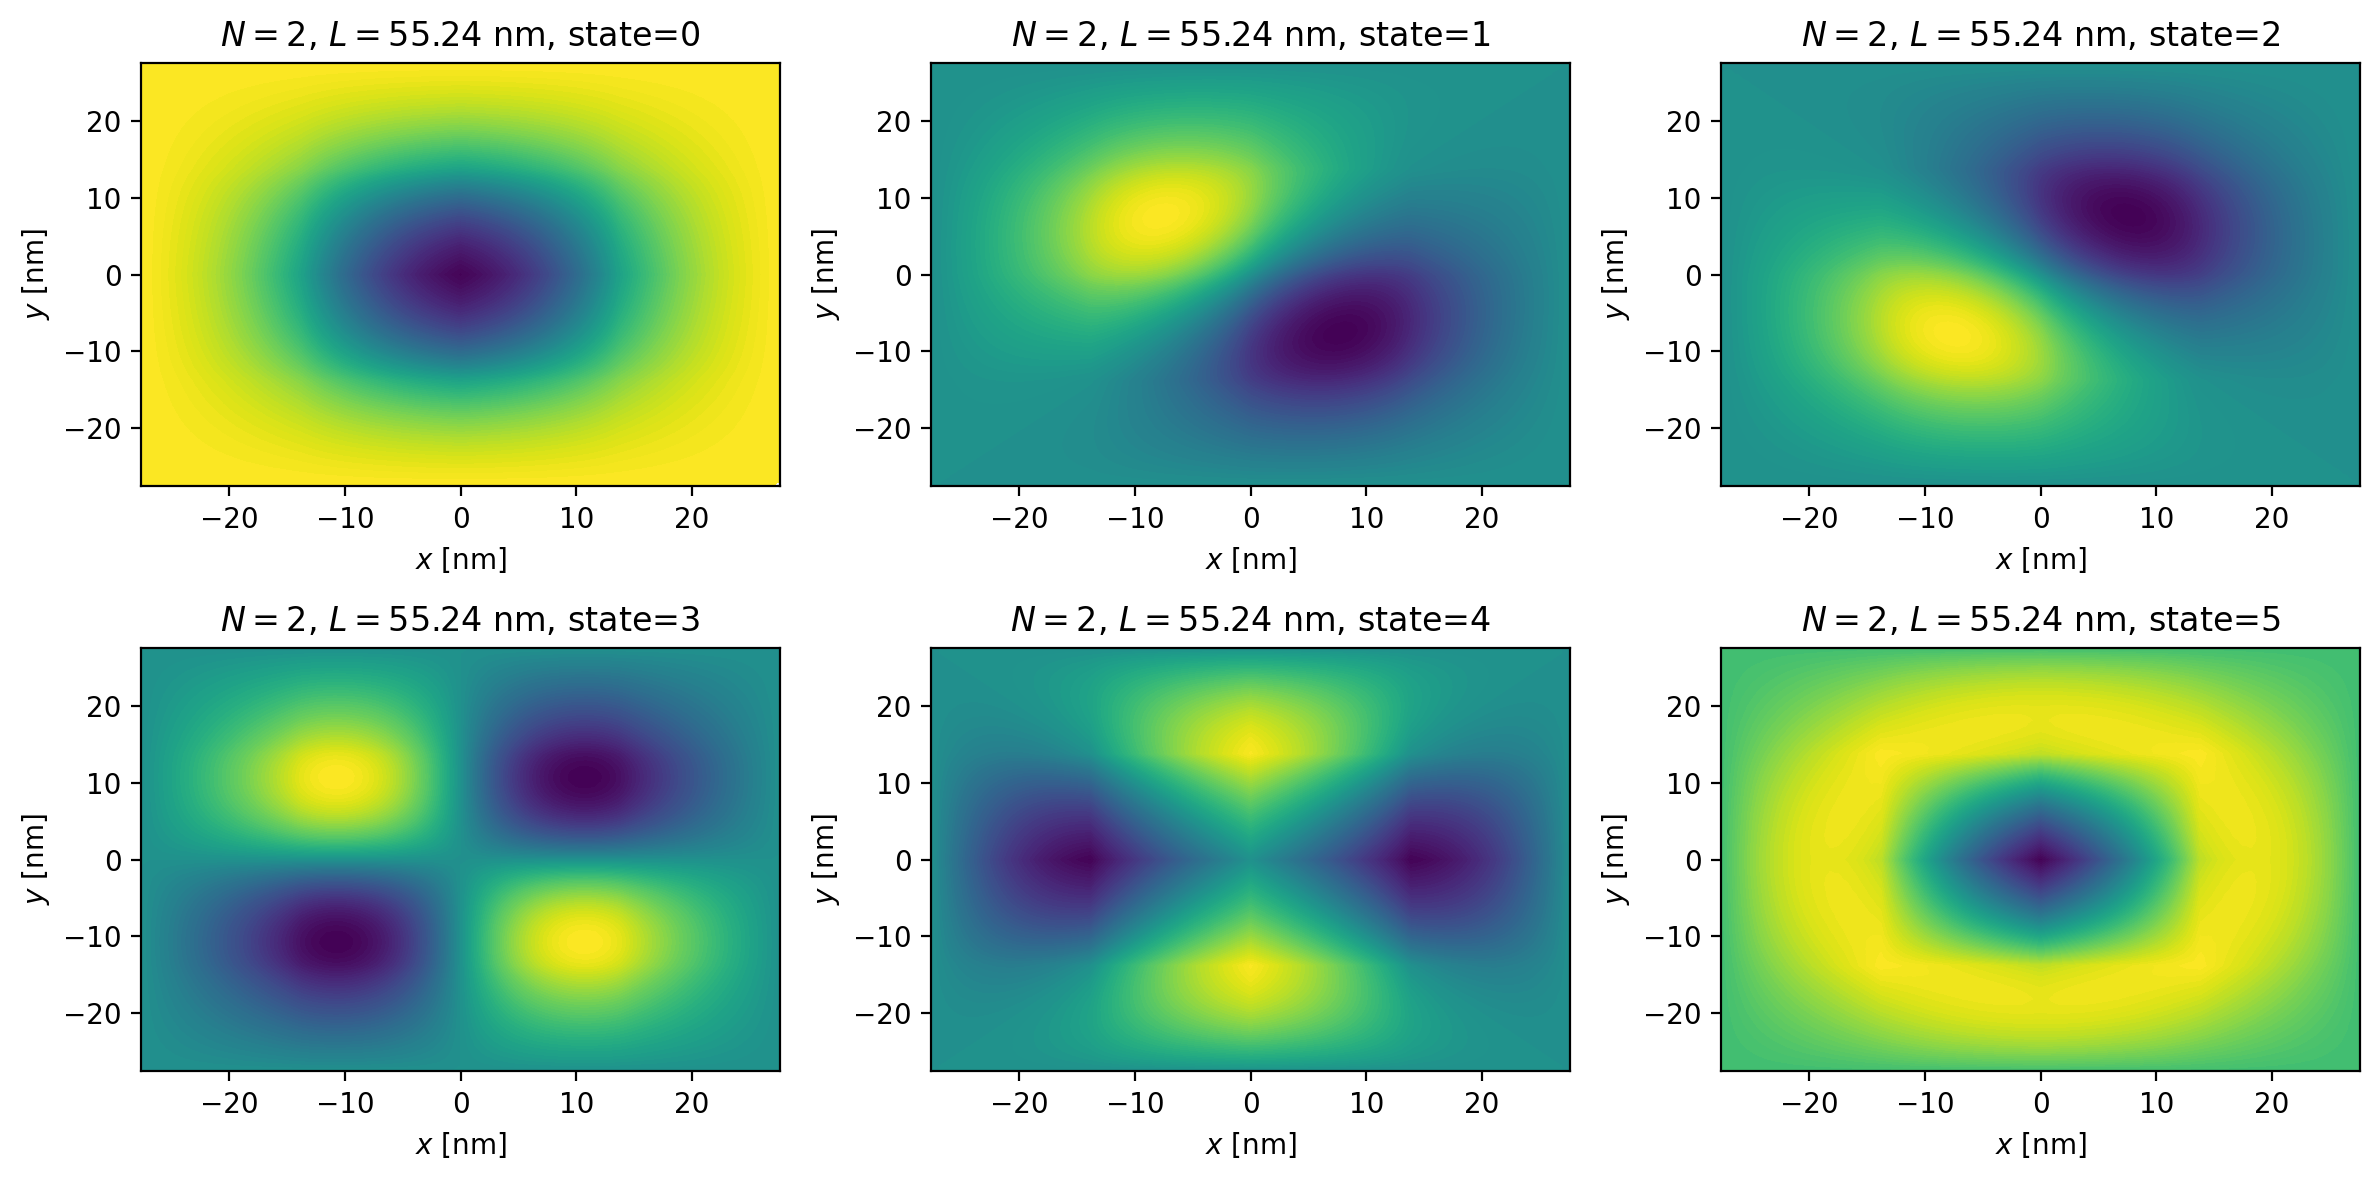

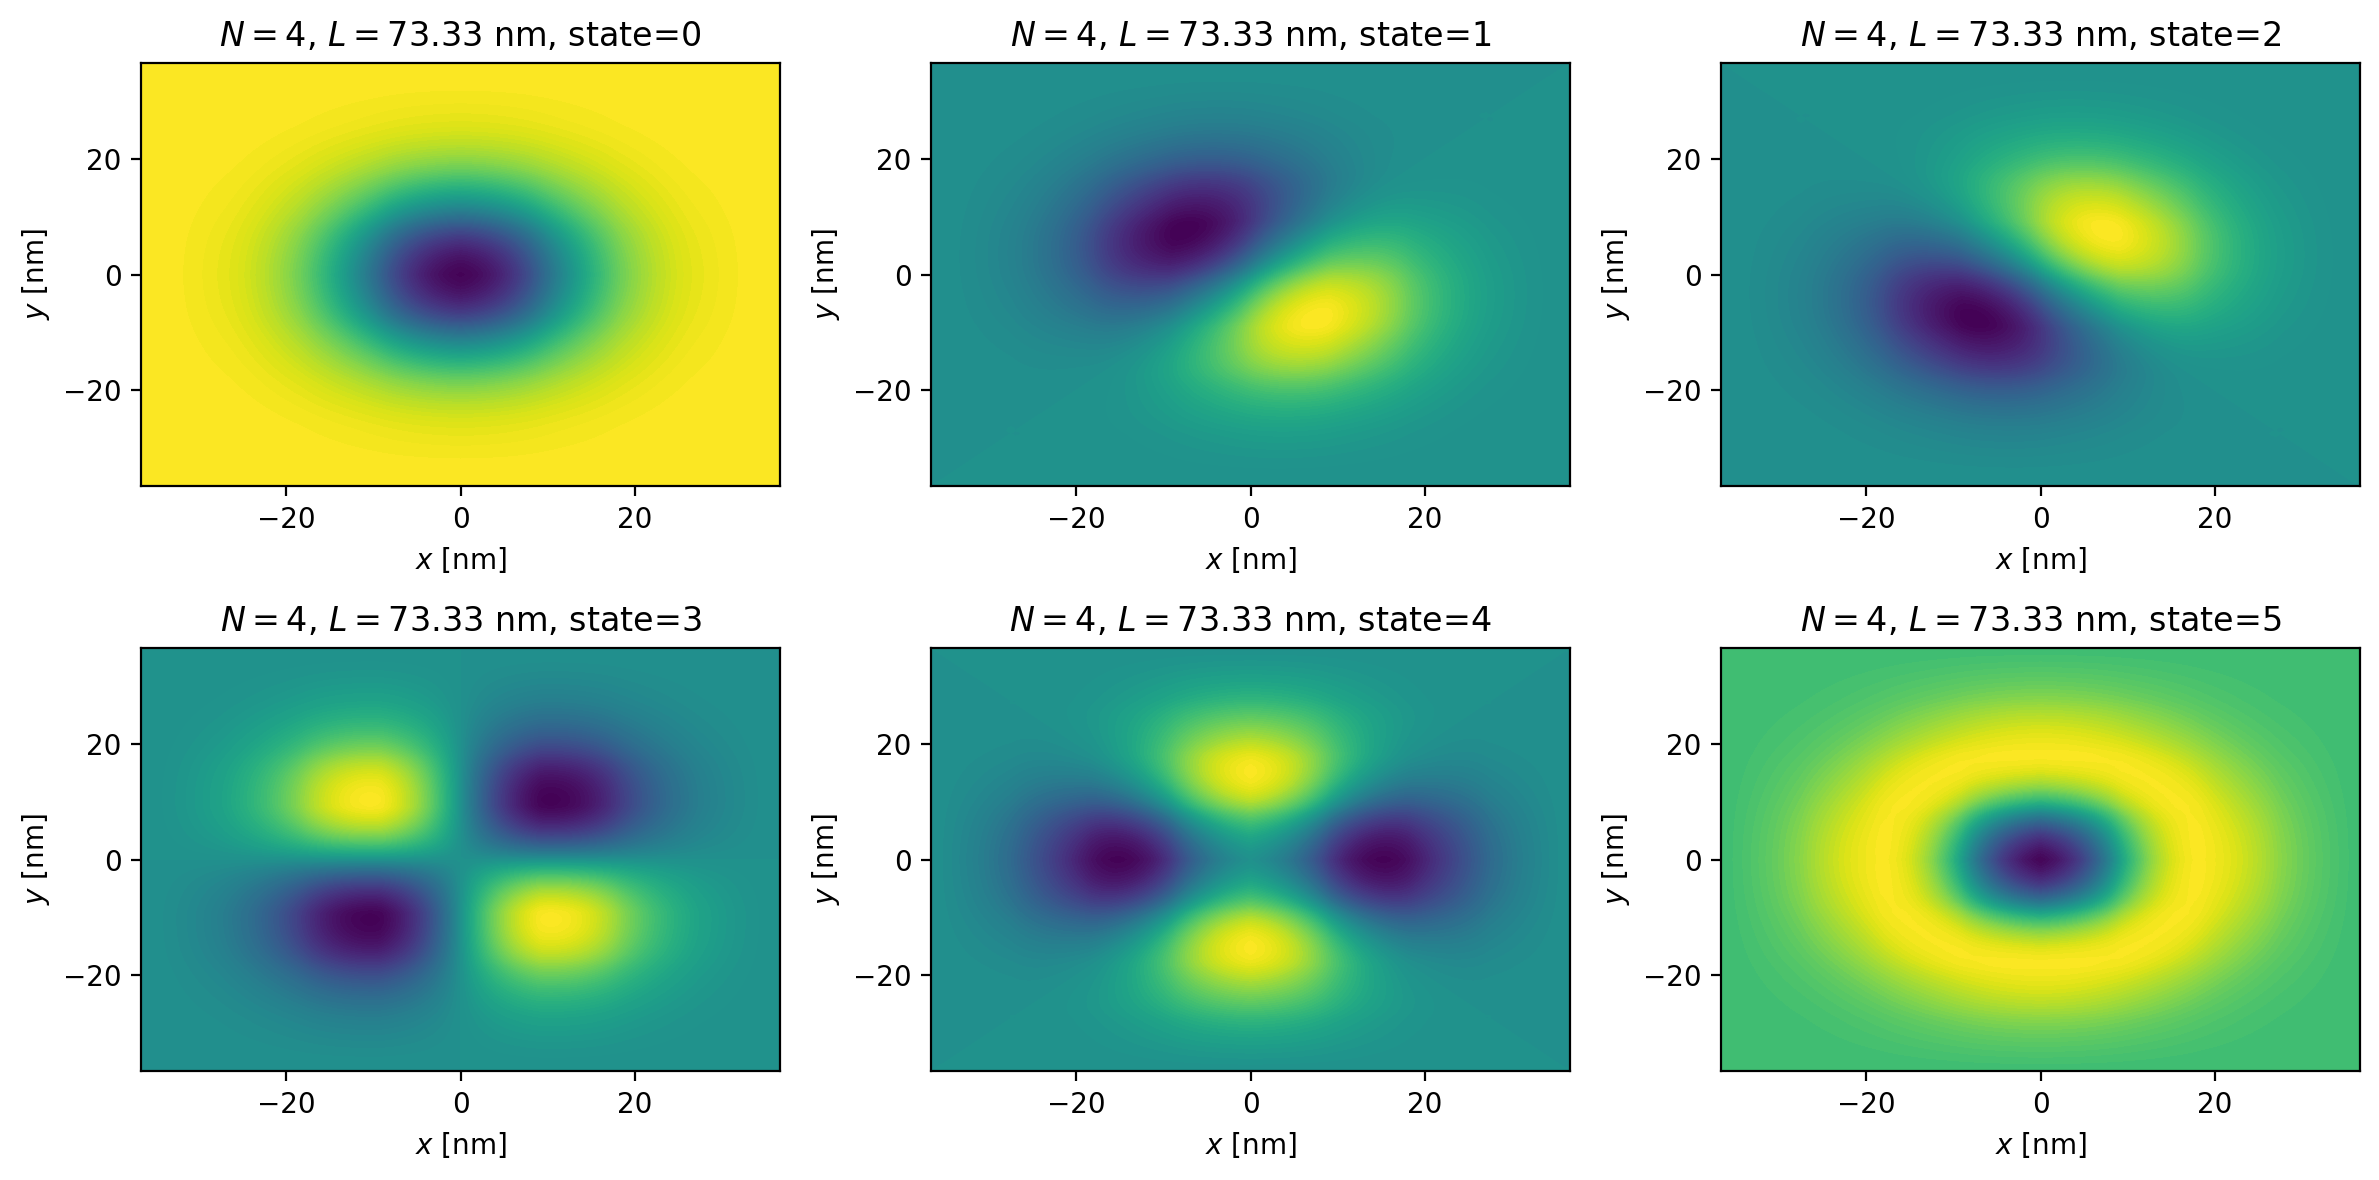

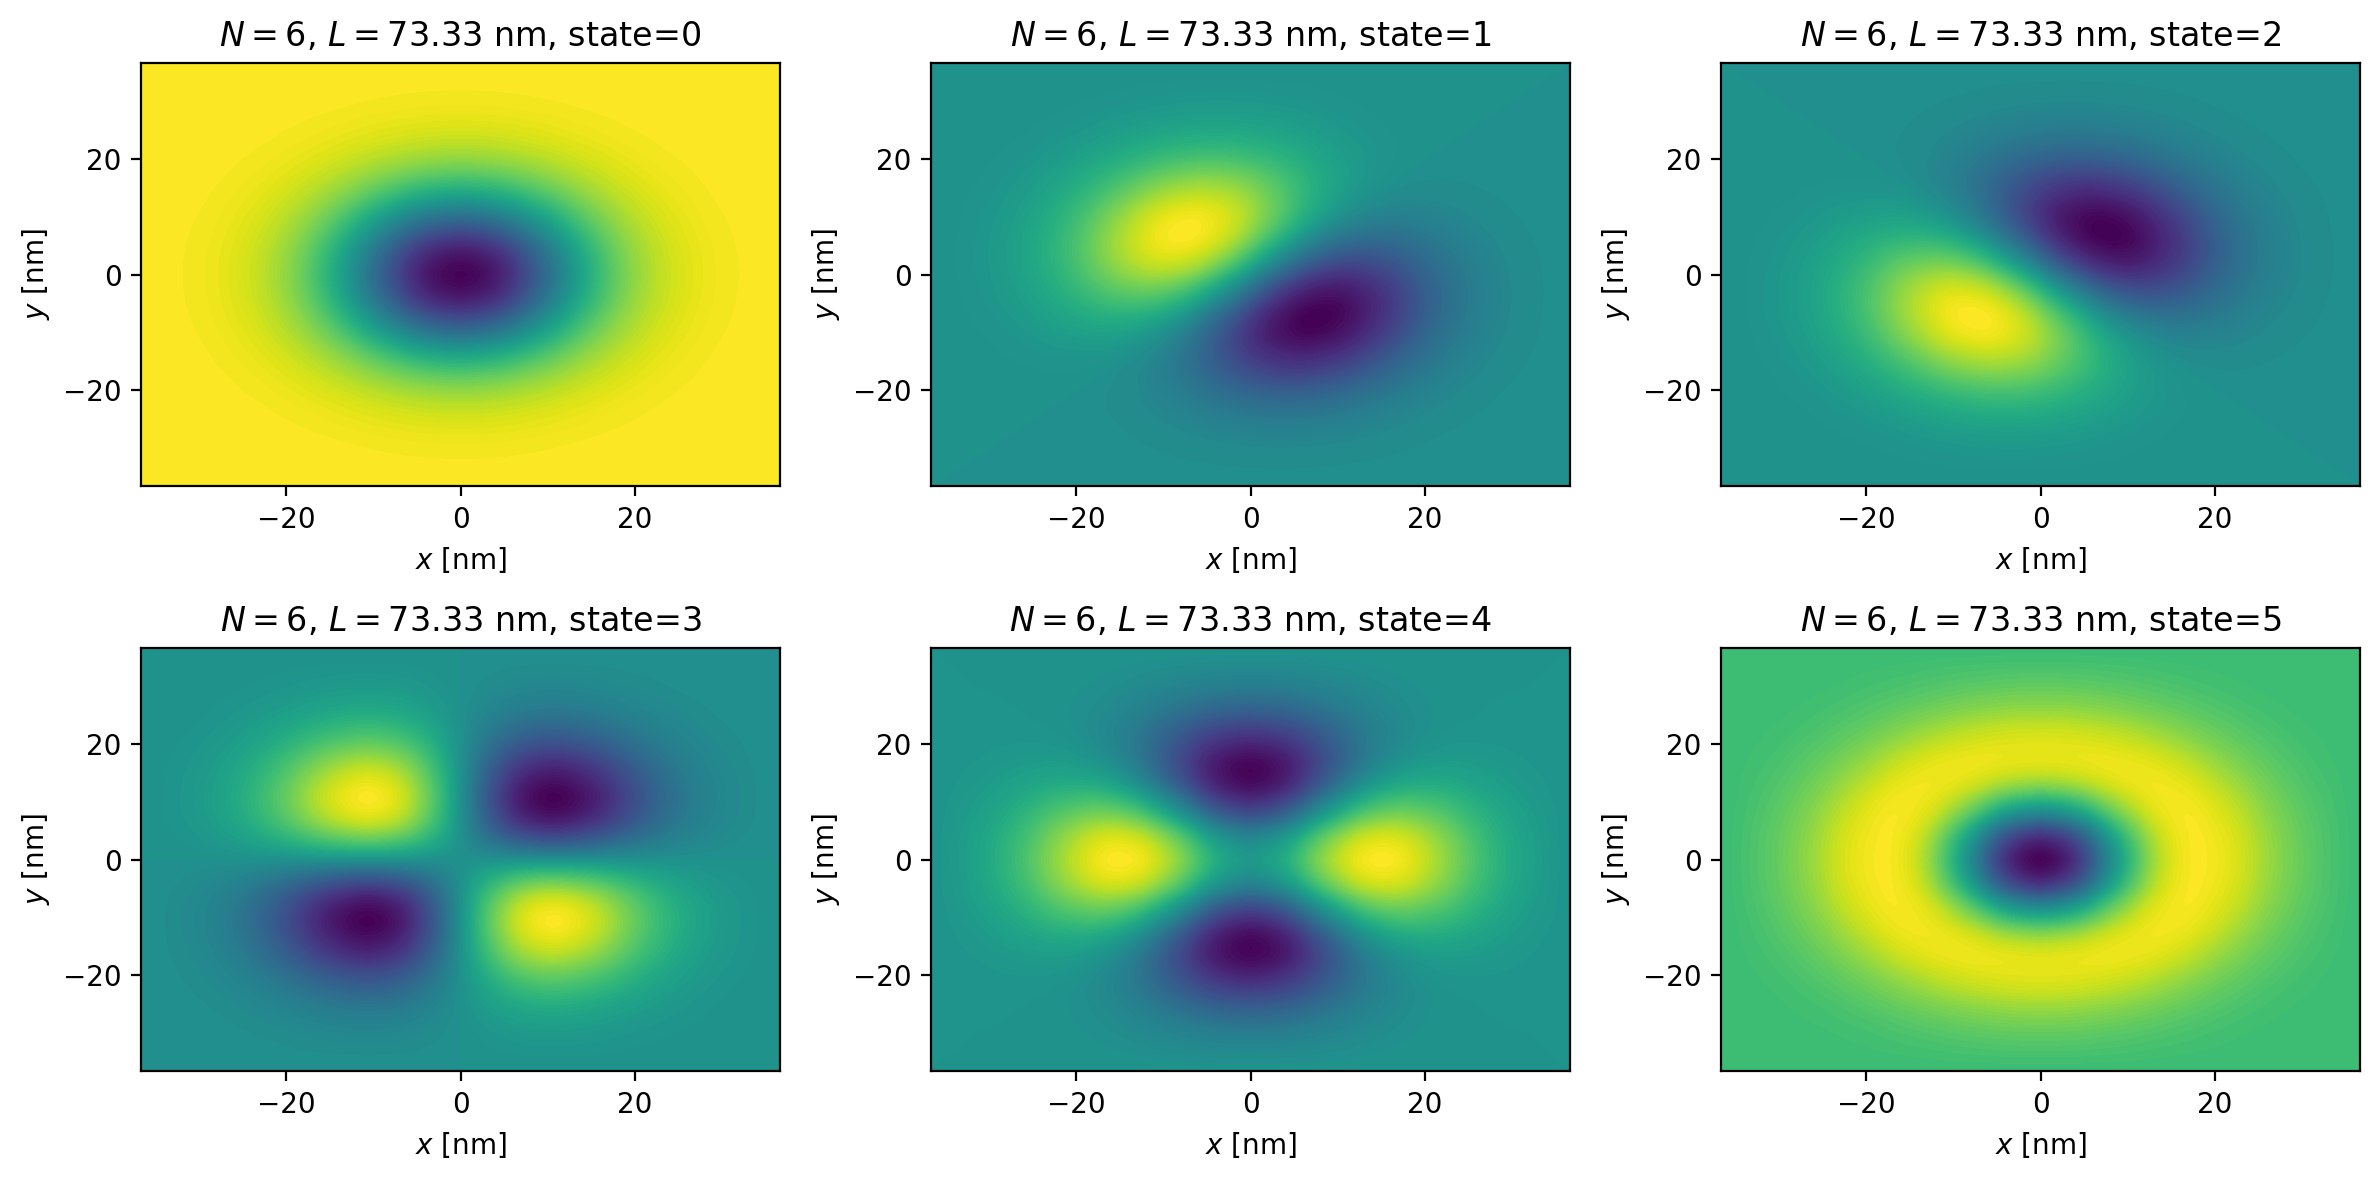

In [48]:
for N in [2, 4, 6]:
    fig, axes = plt.subplots(2, 3, figsize=(12, 6), dpi=200)  # 2 wiersze, 3 kolumny
    L = bestL[N]

    for state in range(6):
        row = state // 3
        col = state % 3
        ax = axes[row, col]

        X, Y, Z = fun.plotState(results, N, L, state=state, resolution=20)
        cont = ax.tricontourf(X, Y, Z, levels=100)
        ax.set_xlabel('$x$ [nm]')
        ax.set_ylabel('$y$ [nm]')
        ax.set_title(f'$N={N}$, $L={L:.2f}$ nm, state={state}')

    plt.tight_layout()
    plt.show()
